<a href="https://colab.research.google.com/github/mlvlab/vision-tutorial/blob/master/03_Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab Session #3: Edge Detection**


by Sihyeon Kim (mlv lab @ Korea University) on October 2019

for SKC Lecture, Fall 2019 (Prof. Hyunwoo J. Kim)


---
**Contents**
1. Sobel Edge Detection
2. Laplacian Edge Detection
3. Canny Edge Detection


**Reference**



*   [Edge Detection](https://opencv-python.readthedocs.io/en/latest/doc/13.imageGradient/imageGradient.html)

---




**0. Preparation**


*   For your convenience, it is recommended to mount your Google Drive first.
*   Then create extra space for this tutorial in there.


---






In [0]:
from google.colab import drive
root = '/content/drive/'
drive.mount(root)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# Making Directory

import os 
from os.path import join

labsession01 = "My Drive/Colab Notebooks/SKC/"   # a custom path. you can change if you want to
labsession01_PATH = join(root,labsession01)
#!mkdir "{labsession01_PATH}"



---


# **1. Sobel Edge Detectionn**

What is Sobel edge detector?

*  an edge detecting method based on the gradients
*   It calculates the first derivatives of the image separately for the X (horizontal changes) and Y (vertical changes) axes



In [0]:
#!cd "{labsession01_PATH}";wget http://aishack.in/static/img/tut/sudoku-original.jpg;
!cd "{labsession01_PATH}";ls

 300px-Kodim17_noisy.jpg	'amazing_choc_cupcakes.jpg?itok=aeKOFRRI'
'330px-Lenna_(test_image).png'	 sudoku-original.jpg


In [0]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

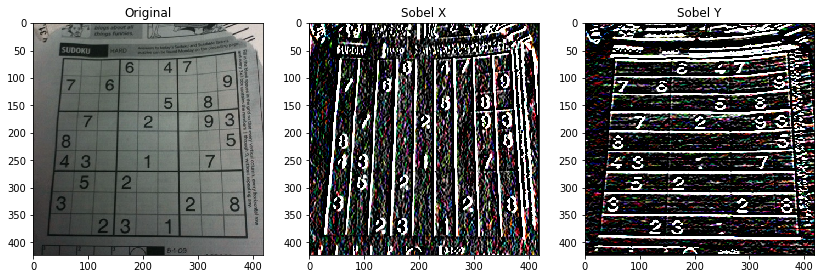

In [0]:
# sobel filters with cv2.Sobel
img0 = cv2.imread('/content/drive/My Drive/Colab Notebooks/SKC/sudoku-original.jpg')
# remove noise
img = cv2.GaussianBlur(img0,(3,3),0)

sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=5)

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (14, 14))
image_list = [img0,sobelx, sobely]
title_list = ["Original","Sobel X", "Sobel Y"]
for i in range(0, 3):
    ax = axs[i]
    ax.imshow(image_list[i])
    ax.title.set_text(title_list[i])
plt.show()

# **2. Laplacian Edge Detection**

What is Sobel edge detector?

*  an edge detecting method based on the second derivatives


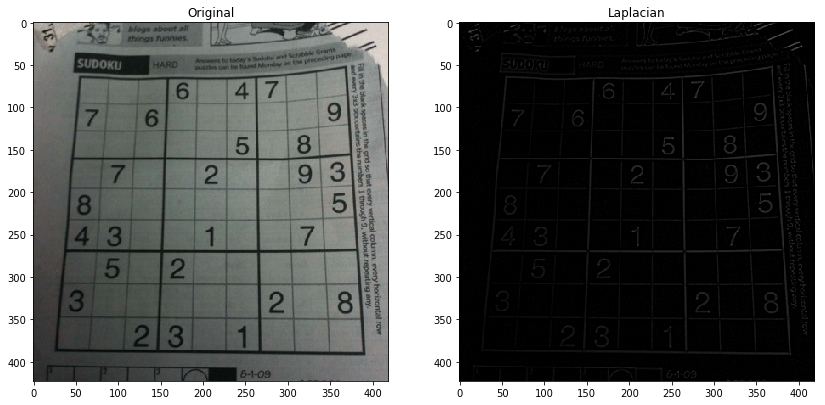

In [0]:
# using sudoku picture above
laplacian = cv2.Laplacian(img,cv2.CV_8U)

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 14))
image_list = [img0,laplacian]
title_list = ["Original","Laplacian"]
for i in range(0, 2):
    ax = axs[i]
    ax.imshow(image_list[i])
    ax.title.set_text(title_list[i])
plt.show()

**Assignment**: Building a edge detector from scratch 

In [0]:
# Using Lena!
img_lena = cv2.imread('/content/drive/My Drive/Colab Notebooks/SKC/330px-Lenna_(test_image).png')
width,height,_ = img_lena.shape

# Convert into gray img
gray = cv2.cvtColor(img_lena, cv2.COLOR_BGR2GRAY)

gray_filtered = np.zeros((width,height))    # initializtion

Let's take a look at filters we used above 

In [0]:
# Sobel Separable Filter in x direction
sobelx1 = np.array([[1,2,1]], dtype = np.float).T  #column
sobelx2 = np.array([[-1,0,1]], dtype = np.float) #row
sobelx = np.multiply(sobelx1,sobelx2)

# Sobel Separable Filter in y direction
sobely1 = np.array([[-1,0,1]], dtype = np.float).T #column
sobely2 = np.array([[1,2,1]], dtype = np.float)  #row
sobely = np.multiply(sobely1,sobely2)

# Laplacian Filter
lap = np.array([[0,1,0],[1,-4,1],[0,1,0]], dtype = np.float)

# Laplacian Filter -> considering diagonals? 
lap2 = np.array([[0,1,0],[0,-8,0],[0,1,0]], dtype = np.float) 

print(sobelx);print(sobely);print(lap);print(lap2);


In [0]:
# pick one filter you want and let's apply it!
# Hint(?): use for loops as much as you can

# **3. Canny Edge Detection**



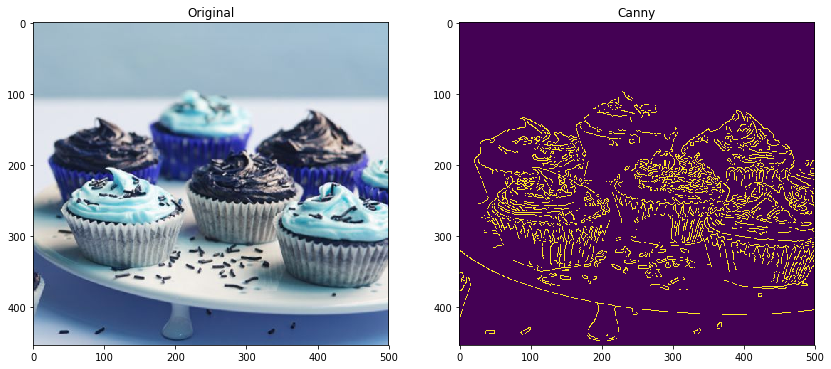

In [0]:
img_cc = cv2.imread('/content/drive/My Drive/Colab Notebooks/SKC/amazing_choc_cupcakes.jpg?itok=aeKOFRRI')

canny = cv2.Canny(img_cc,100,200)

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 14))
image_list = [img_cc,canny]
title_list = ["Original","Canny"]
for i in range(0, 2):
    ax = axs[i]
    ax.imshow(image_list[i])
    ax.title.set_text(title_list[i])
plt.show()